In [7]:
%matplotlib inline
import torch
import cv2
import numpy as np
import torchvision # torch package for vision related things
import torch.nn.functional as F  # Parameterless functions, like (some) activation functions
import torchvision.datasets as datasets  # Standard datasets
import torchvision.transforms as transforms  # Transformations we can perform on our dataset for augmentation
from torch import optim  # For optimizers like SGD, Adam, etc.
from torch import nn  # All neural network modules
from torch.utils.data import DataLoader  # Gives easier dataset managment by creating mini batches etc.
from tqdm import tqdm  # For nice progress bar!
import matplotlib.pyplot as plt

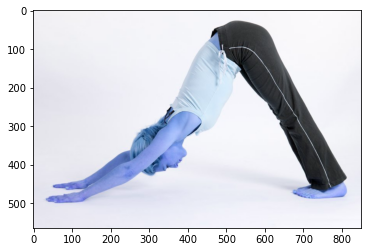

In [3]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread(r"C:\Users\divyansh\Downloads\archive\DATASET\TRAIN\downdog\00000128.jpg")

#Show the image with matplotlib
plt.imshow(image)
plt.show()

In [8]:
model = torchvision.models.detection.keypointrcnn_resnet50_fpn(pretrained=True)

In [9]:
model.eval()

KeypointRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(640, 672, 704, 736, 768, 800), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.

In [10]:
keypoints = ['nose','left_eye','right_eye','left_ear','right_ear','left_shoulder','right_shoulder','left_elbow',
                'right_elbow','left_wrist','right_wrist','left_hip','right_hip','left_knee', 'right_knee', 'left_ankle','right_ankle']


print(keypoints)

['nose', 'left_eye', 'right_eye', 'left_ear', 'right_ear', 'left_shoulder', 'right_shoulder', 'left_elbow', 'right_elbow', 'left_wrist', 'right_wrist', 'left_hip', 'right_hip', 'left_knee', 'right_knee', 'left_ankle', 'right_ankle']


In [11]:
def get_limbs_from_keypoints(keypoints):
    limbs = [       
        [keypoints.index('right_eye'), keypoints.index('nose')],
        [keypoints.index('right_eye'), keypoints.index('right_ear')],
        [keypoints.index('left_eye'), keypoints.index('nose')],
        [keypoints.index('left_eye'), keypoints.index('left_ear')],
        [keypoints.index('right_shoulder'), keypoints.index('right_elbow')],
        [keypoints.index('right_elbow'), keypoints.index('right_wrist')],
        [keypoints.index('left_shoulder'), keypoints.index('left_elbow')],
        [keypoints.index('left_elbow'), keypoints.index('left_wrist')],
        [keypoints.index('right_hip'), keypoints.index('right_knee')],
        [keypoints.index('right_knee'), keypoints.index('right_ankle')],
        [keypoints.index('left_hip'), keypoints.index('left_knee')],
        [keypoints.index('left_knee'), keypoints.index('left_ankle')],
        [keypoints.index('right_shoulder'), keypoints.index('left_shoulder')],
        [keypoints.index('right_hip'), keypoints.index('left_hip')],
        [keypoints.index('right_shoulder'), keypoints.index('right_hip')],
        [keypoints.index('left_shoulder'), keypoints.index('left_hip')]
        ]
    return limbs


limbs = get_limbs_from_keypoints(keypoints)

In [66]:
from torchvision import transforms 
from torchvision import datasets
transform = transforms.Compose([transforms.Resize(255),
                                transforms.CenterCrop(300),
                                transforms.ToTensor()])

In [67]:

train_dataset=datasets.ImageFolder(root=r'C:\Users\divyansh\Downloads\archive\DATASET\TRAIN',transform=transform)

In [68]:
print(train_dataset)

Dataset ImageFolder
    Number of datapoints: 1081
    Root location: C:\Users\divyansh\Downloads\archive\DATASET\TRAIN
    StandardTransform
Transform: Compose(
               Resize(size=255, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(300, 300))
               ToTensor()
           )


In [69]:
dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

In [70]:
images, labels = next(iter(dataloader))

In [ ]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread(r"C:\Users\divyansh\Downloads\archive\DATASET\TRAIN\downdog\00000128.jpg")

#Show the image with matplotlib
plt.imshow(image)
plt.show()

In [72]:
output = model(images)[1]


RuntimeError: [enforce fail at ..\c10\core\CPUAllocator.cpp:79] data. DefaultCPUAllocator: not enough memory: you tried to allocate 163840000 bytes.

In [ ]:
def tensor_to_image(inp):
    inp=inp.numpy().transpose((2,1,0))
    mean=np.array([0.485,0.456,0.406])
    std=np.array([0.229,0.224,0.225])
    inp=std*inp+mean
    inp=np.clip(inp,0,1)
    return inp

In [ ]:
%matplotlib inline
#The line above is necesary to show Matplotlib's plots inside a Jupyter Notebook

import cv2
from matplotlib import pyplot as plt

#Import image
image = cv2.imread(r"C:\Users\divyansh\Downloads\archive\DATASET\TRAIN\downdog\00000128.jpg")

#Show the image with matplotlib
plt.imshow(image)
plt.show()

In [ ]:
print(output.keys())

In [ ]:
import matplotlib.pyplot as plt

def draw_keypoints_per_person(images, all_keypoints, all_scores, confs, keypoint_threshold=2, conf_threshold=0.9):
    # initialize a set of colors from the rainbow spectrum
    cmap = plt.get_cmap('rainbow')
    # create a copy of the image
    img_copy = images.copy()
    # pick a set of N color-ids from the spectrum
    color_id = np.arange(1,255, 255//len(all_keypoints)).tolist()[::-1]
    # iterate for every person detected
    for person_id in range(len(all_keypoints)):
      # check the confidence score of the detected person
      if confs[person_id]>conf_threshold:
        # grab the keypoint-locations for the detected person
        keypoints = all_keypoints[person_id, ...]
        # grab the keypoint-scores for the keypoints
        scores = all_scores[person_id, ...]
        # iterate for every keypoint-score
        for kp in range(len(scores)):
            # check the confidence score of detected keypoint
            if scores[kp]>keypoint_threshold:
                # convert the keypoint float-array to a python-list of integers
                keypoint = tuple(map(int, keypoints[kp, :2].detach().numpy().tolist()))
                # pick the color at the specific color-id
                color = tuple(np.asarray(cmap(color_id[person_id])[:-1])*255)
                # draw a circle over the keypoint location
                cv2.circle(img_copy, keypoint, 3, color, -1)

    return img_copy


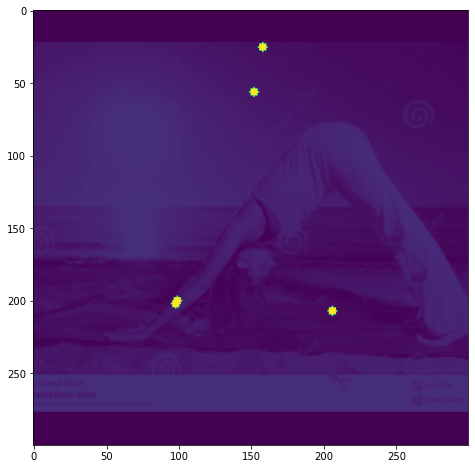

In [73]:
keypoints_img = draw_keypoints_per_person(tensor_to_image(images[1]), output["keypoints"], output["keypoints_scores"], output["scores"], keypoint_threshold=2)

cv2.imwrite("output/keypoints-img.jpg", keypoints_img)
transform = transforms.Compose([transforms.ToTensor()])
keypoints_img_tensor = transform(keypoints_img)
keypoints_img_numpy=tensor_to_image(keypoints_img_tensor)
plt.figure(figsize=(8, 8))
plt.imshow(keypoints_img_numpy[:, :, ::10])
plt.show()

In [ ]:
def draw_skeleton_per_person(img, all_keypoints, all_scores, confs, keypoint_threshold=2, conf_threshold=0.9):
    
    # initialize a set of colors from the rainbow spectrum
    cmap = plt.get_cmap('rainbow')
    # create a copy of the image
    img_copy = img.copy()
    # check if the keypoints are detected
    if len(output["keypoints"])>0:
      # pick a set of N color-ids from the spectrum
      colors = np.arange(1,255, 255//len(all_keypoints)).tolist()[::-1]
      # iterate for every person detected
      for person_id in range(len(all_keypoints)):
          # check the confidence score of the detected person
          if confs[person_id]>conf_threshold:
            # grab the keypoint-locations for the detected person
            keypoints = all_keypoints[person_id, ...]

            # iterate for every limb 
            for limb_id in range(len(limbs)):
              # pick the start-point of the limb
              limb_loc1 = keypoints[limbs[limb_id][0], :2].detach().numpy().astype(np.int32)
              # pick the start-point of the limb
              limb_loc2 = keypoints[limbs[limb_id][1], :2].detach().numpy().astype(np.int32)
              # consider limb-confidence score as the minimum keypoint score among the two keypoint scores
              limb_score = min(all_scores[person_id, limbs[limb_id][0]], all_scores[person_id, limbs[limb_id][1]])
              # check if limb-score is greater than threshold
              if limb_score> keypoint_threshold:
                # pick the color at a specific color-id
                color = tuple(np.asarray(cmap(colors[person_id])[:-1])*255)
                # draw the line for the limb
                cv2.line(img_copy, tuple(limb_loc1), tuple(limb_loc2), color, 1)

    return img_copy

In [ ]:
skeleton_img = draw_skeleton_per_person(tensor_to_image(images[1]), output["keypoints"], output["keypoints_scores"], output["scores"],keypoint_threshold=2)

cv2.imwrite("output/skeleton-img.jpg", skeleton_img)
transform = transforms.Compose([transforms.ToTensor()])
skeleton_img_tensor = transform(skeleton_img)
skeleton_img_numpy=tensor_to_image(skeleton_img_tensor)
plt.figure(figsize=(8, 8))
plt.imshow(skeleton_img_numpy[:, :, ::10])
plt.show()